In [1]:
import os
import requests
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Retrieve the census API key from the environments
CENSUS_API_KEY = os.getenv("CENSUS_API_KEY")

# Define the base URL for the Census API
BASE_URL = "https://api.census.gov/data/{year}/acs/acs5"

# Variables for male and female populations in the Census API
MALE_VAR = "B01001_002E"
FEMALE_VAR = "B01001_026E"

# Function to retrieve census data for a given year and state, not having to repeat again.
def get_population_data(year, api_key):
    url = BASE_URL.format(year=year)
    params = {
        "get": f"{MALE_VAR},{FEMALE_VAR}",
        "for": "us:*",  # national data
        "key": api_key
    }
    response = requests.get(url, params=params)
    if response.status_code == 200:
        return response.json()
    else:
        raise Exception(f"Error fetching data for {year}: {response.status_code}")


In [3]:
# Initialize lists to store the years and populations
years = []
male_female_ratios = []  # Store ratios
male_female_percentages = []  # Store percentages
male_populations = []
female_populations = []

In [4]:
# Loop through the last 10 years (adjust the years as needed)
for year in range(2013, 2023):
    data = get_population_data(year, CENSUS_API_KEY)
    
    # The data is in the form [header, [male, female, ...]]
    # Checks to see if the header of the data has 2 headers, Male_Pop and female_pop
    # Checks to see if the index in the second row is numeric and same thing for the second data index
    if data and len(data) > 1 and data[1][0].isdigit() and data[1][1].isdigit():
        male_population = int(data[1][0])  # Male population value
        female_population = int(data[1][1])  # Female population value
    else:
        male_population = 0
        female_population = 0
    
    # Calculate the male-to-female population ratio
    if female_population > 0:
        ratio = male_population / female_population
        percentage = ratio * 100  # Convert ratio to percentage
    else:
        ratio = 0
        percentage = 0
    
    # Store the year, populations, ratio, and calculated percentage
    years.append(year)
    male_female_ratios.append(ratio)
    male_female_percentages.append(percentage)  # Store percentage
    male_populations.append(male_population)
    female_populations.append(female_population)

In [5]:
# Convert the lists into a pandas DataFrame for easier plotting
df = pd.DataFrame({
    "Year": years,
    "Male_to_Female_Percentage": male_female_percentages,  # Updated column for percentage
    "Male_to_Female_ratio": male_female_ratios,
    "Male_Population": male_populations,
    "Female_Population": female_populations
})

# Display the DataFrame
print("\nMale-to-Female Percentages DataFrame:")
print(df)


Male-to-Female Percentages DataFrame:
   Year  Male_to_Female_Percentage  Male_to_Female_ratio  Male_Population  \
0  2013                  96.814836              0.968148        153247412   
1  2014                  96.818908              0.968189        154515159   
2  2015                  96.861278              0.968613        155734280   
3  2016                  96.892620              0.968926        156765322   
4  2017                  96.952553              0.969526        158018753   
5  2018                  96.989577              0.969896        158984190   
6  2019                  97.012359              0.970124        159886919   
7  2020                  97.024299              0.970243        160818530   
8  2021                  98.010885              0.980109        163206615   
9  2022                  98.384038              0.983840        164200298   

   Female_Population  
0          158289182  
1          159591925  
2          160780741  
3          161792840 

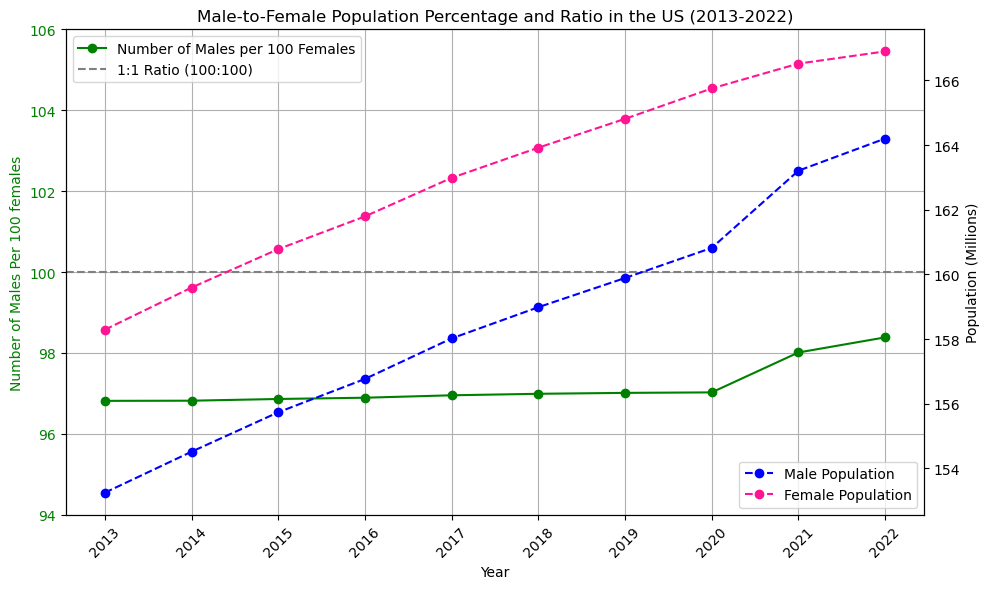

In [39]:
# Plot the data using matplotlib
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot the Male-to-Female Percentage on ax1 (converted ratio to percentage)
ax1.plot(df["Year"], df["Male_to_Female_Percentage"], marker='o', linestyle='-', color='green', label='Number of Males per 100 Females')
ax1.set_xlabel("Year")
ax1.set_ylabel("Number of Males Per 100 females", color='green')
ax1.tick_params(axis='y', labelcolor='green')
ax1.grid(True)
ax1.set_xticks(df["Year"])
ax1.set_xticklabels(df["Year"], rotation=45)

# Set the y-axis ticks from 94 to 106, with 1% increments
ax1.set_yticks(range(94, 107, 2))
ax1.set_ylim([94, 106])

# Add a horizontal line at y=100 (1:1 ratio in percentage terms)
ax1.axhline(y=100, color='gray', linestyle='--', label='1:1 Ratio (100:100)')
# Create a second y-axis to show male and female population counts
ax2 = ax1.twinx()
# Plot the Population values on the secondary y-axis
ax2.plot(df["Year"], df["Male_Population"] / 1_000_000, marker='o', linestyle='--', color='blue', label='Male Population')
ax2.plot(df["Year"], df["Female_Population"] / 1_000_000, marker='o', linestyle='--', color='deeppink', label='Female Population')

ax2.set_ylabel("Population (Millions)", color='black')
ax2.tick_params(axis='y', labelcolor='black')

# Adding legends for both axes
ax1.legend(loc='upper left')
ax2.legend(loc='lower right')


# Title and layout adjustments
plt.title("Male-to-Female Population Percentage and Ratio in the US (2013-2022)")
plt.tight_layout()

# Display the plot
plt.show()